## Holt's Method

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [172]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.columns

Index([             'Part ID',    'Planning Leadtime',         'Order Policy',
                'Order Point',     'Safety Stock Qty',      'Fixed Order Qty',
             'Days Of Supply',    'Minimum Order Qty',    'Maximum Order Qty',
         'Multiple Order Qty',                  'Fab',                  'Pur',
                    'Stocked',          'Detail Only',              'Purc Lt',
                   'Abc Code',     'Inventory Locked',           'Inventory$',
         'Unit Material Cost',     'Annual Usage Qty',        'Prev Yr Usage',
             'Roll Ann Usage',          'Qty On Hand',    'Qty Available Mrp',
                   'TotAlloc',           'Coeff_Code',             'Stock Um',
           'Def Orig Country',       'Primary Whs Id',       'Primary Loc Id',
         'Annual Usage Value',       2666342.46838269,             'Profit %',
       'Cummulatove Profit %',           'Jan (2018)',           'Feb (2018)',
                 'Mar (2018)',           'Apr (2018)

### Accuracy in Forecasting

In [173]:
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

Rolling forecast is a dynamic approach that updates the forecast as new data becomes available. This method is more responsive to changes in the data and can be more accurate than a forecast made at one point in time.

In [174]:
# Calculate mean demand for each month
train_data = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0)
test_data = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0)

In [175]:
from sklearn.metrics import mean_squared_error

alpha_values = np.linspace(0.4, 0.8)
beta_values = np.linspace(0.2, 0.4)

# Initialize variables to store the best scores
best_alpha, best_beta = None, None
best_mse = float("inf")

# Grid search over possible values of alpha and beta
for alpha in alpha_values:
    for beta in beta_values:
        # Fit model
        model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
        fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
        
        # Forecast
        forecasts = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MSE
        mse = mean_squared_error(test_data, forecasts)
        
        # Update best scores if current MSE is lower
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_beta = beta

# Print best alpha, beta, and MSE
print(f'Best alpha: {best_alpha}')
print(f'Best beta: {best_beta}')
print(f'Best MSE: {best_mse}')

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

Best alpha: 0.4
Best beta: 0.2122448979591837
Best MSE: 280.5991600589323


/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

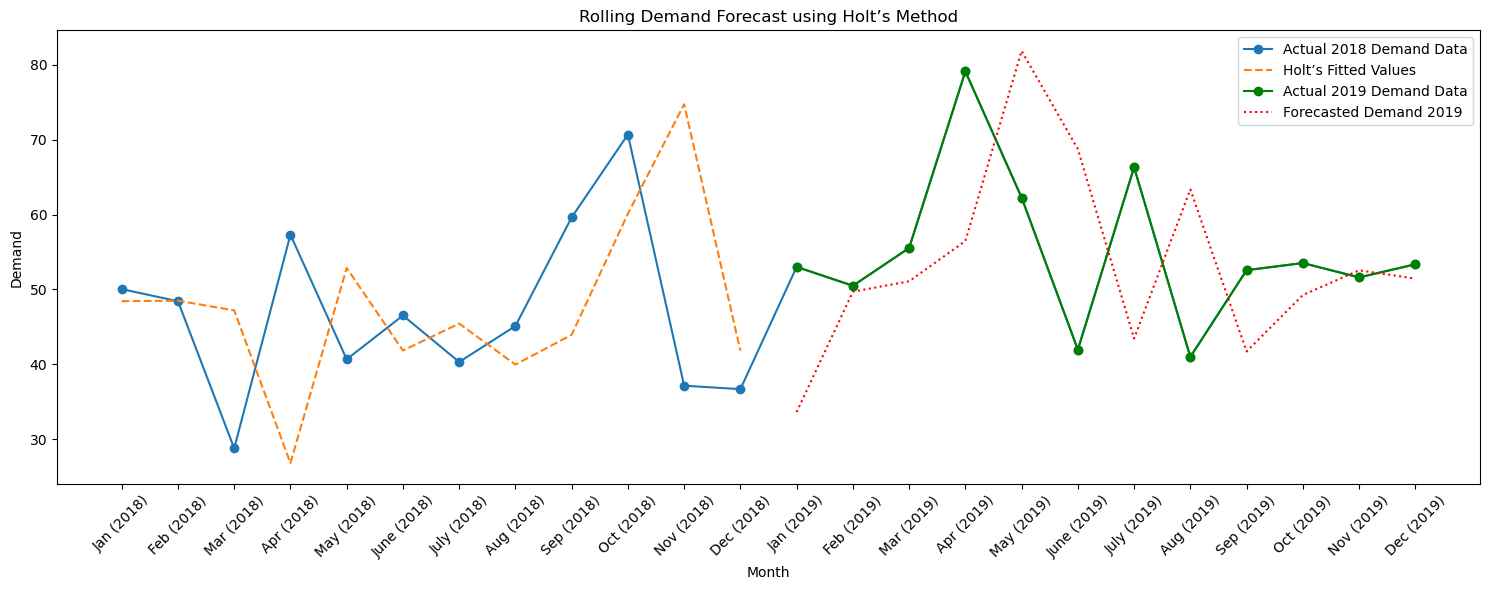

In [176]:
# Initialize model with chosen alpha and beta values
alpha = 0.8
beta = 0.3

# Fit the model on the training data
model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

# Create an empty series to store rolling forecasts
rolling_forecasts = pd.Series(index=test_data.index)

# Perform rolling forecasting
for period, actual_value in test_data.items():
    # Forecast the next step
    next_forecast = fitted_model.forecast(steps=1).iloc[0]
    rolling_forecasts.at[period] = next_forecast
    
    # Update the training data with the new actual value
    train_data.at[period] = actual_value
    model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

# Plot the training data, fitted model, and rolling forecasts
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Actual 2018 Demand Data', marker='o')
plt.plot(train_data.index[:-len(test_data)], fitted_model.fittedvalues[:-len(test_data)], label='Holt’s Fitted Values', linestyle='--')
plt.plot(test_data.index, test_data, label='Actual 2019 Demand Data', marker='o', color='green')
plt.plot(rolling_forecasts.index, rolling_forecasts, label='Forecasted Demand 2019', color='red', linestyle=':')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Rolling Demand Forecast using Holt’s Method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Initializes Holt's linear trend model on the training data (2018).
2. Enters a loop to perform the rolling forecast for each month in the test data (2019):
- Forecasts the next data point.
- Appends the actual data point to the training set.
- Re-fits the model including the new actual data point.
3. Collects the forecasts and actual data to plot them for visual compariso

In [177]:
# ensure there are no NaNs in the forecasts
forecast_errors = test_data - rolling_forecasts.dropna() 

# Mean Absolute Deviation
mad = forecast_errors.abs().mean() 

# Mean Squared Error
mse = (forecast_errors ** 2).mean()

 # Mean Absolute Percentage Error
mape = (forecast_errors.abs() / test_data).mean() * 100

print(f"Forecasted Values: {forecast_errors}")
print(f"MAD: {mad}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

Forecasted Values: Jan (2019)     19.405847
Feb (2019)      0.797081
Mar (2019)      4.450757
Apr (2019)     22.667624
May (2019)    -19.596981
June (2019)   -26.815043
July (2019)    22.895104
Aug (2019)    -22.390751
Sep (2019)     10.868655
Oct (2019)      4.272309
Nov (2019)     -0.945648
Dec (2019)      1.906528
dtype: float64
MAD: 13.084360662549978
MSE: 265.031813873344
MAPE: 24.45666272572121


### On a Product Level

#### Repeaters (First 10 Products)

In [178]:
# Filter for 'Repeater' products
df_repeaters = df[df['Coeff_Code'] == 'Repeater'].set_index('Part ID').drop(columns=['Coeff_Code'])

start_index_2018 = df_repeaters.columns.get_loc("Jan (2018)")
end_index_2018 = df_repeaters.columns.get_loc("Dec (2018)")
start_index_2019 = df_repeaters.columns.get_loc("Jan (2019)")
end_index_2019 = df_repeaters.columns.get_loc("Dec (2019)")

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

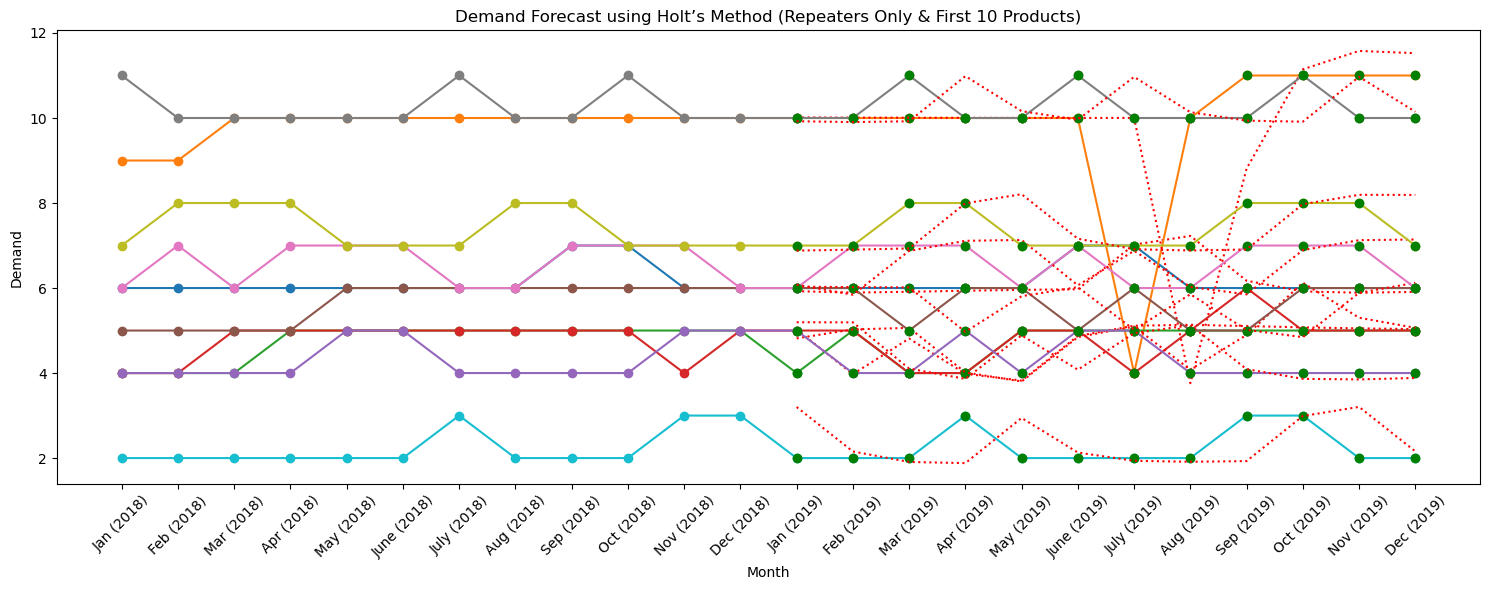

Average MAD for first 10 products: 0.5734198492569407
Average MSE for first 10 products: 1.0943625760610658
Average MAPE for first 10 products: 11.073074032515688


In [179]:
# Define the smoothing coefficients
alpha = 0.8
beta = 0.3

# Initialize a figure for plotting
plt.figure(figsize=(15, 6))

# Counter to track the number of products processed
num_products_processed = 0

# Initialize lists to store metrics for each product
mad_list = []
mse_list = []
mape_list = []

# Process each product
for product_id, row in df_repeaters.iterrows():
     if num_products_processed < 10:
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(method='ffill').dropna()

        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1]
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        # Fit the model on the training data if it's not empty
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

            forecasts = []
            errors = []

            # Forecast for each period in 2019
            rolling_forecasts = pd.Series(index=test_data.index)
            
            # Perform rolling forecasting
            for period, actual_value in test_data.items():
                # Forecast the next step
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                rolling_forecasts.at[period] = next_forecast

                # Calculate error for the forecasted step
                error = actual_value - next_forecast
                errors.append(error)
                
                # Update the training data with the new actual value
                train_data.at[period] = actual_value
                model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
            
            # Calculate MAD, MSE, MAPE for the product
            mad = np.mean(np.abs(errors))
            mse = np.mean(np.square(errors))
            mape = np.mean(np.abs(np.divide(errors, test_data)))*100
            
            # Store the calculated metrics
            mad_list.append(mad)
            mse_list.append(mse)
            mape_list.append(mape)

            # Plot the results
            plt.plot(train_data.index, train_data, label=f'{product_id} Actual 2018 Demand', marker='o')
            plt.plot(test_data.index, test_data, label=f'{product_id} Actual 2019 Demand', marker='o', linestyle='', color='green')
            plt.plot(rolling_forecasts.index, rolling_forecasts, label=f'{product_id} Forecasted 2019 Demand', linestyle=':', color='red')
        
        # Increment the counter
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand Forecast using Holt’s Method (Repeaters Only & First 10 Products)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')

#### Runners (First 10 Products)

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1411: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1418: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
/Users/kiranjitnagra/anaconda3/lib/pyth

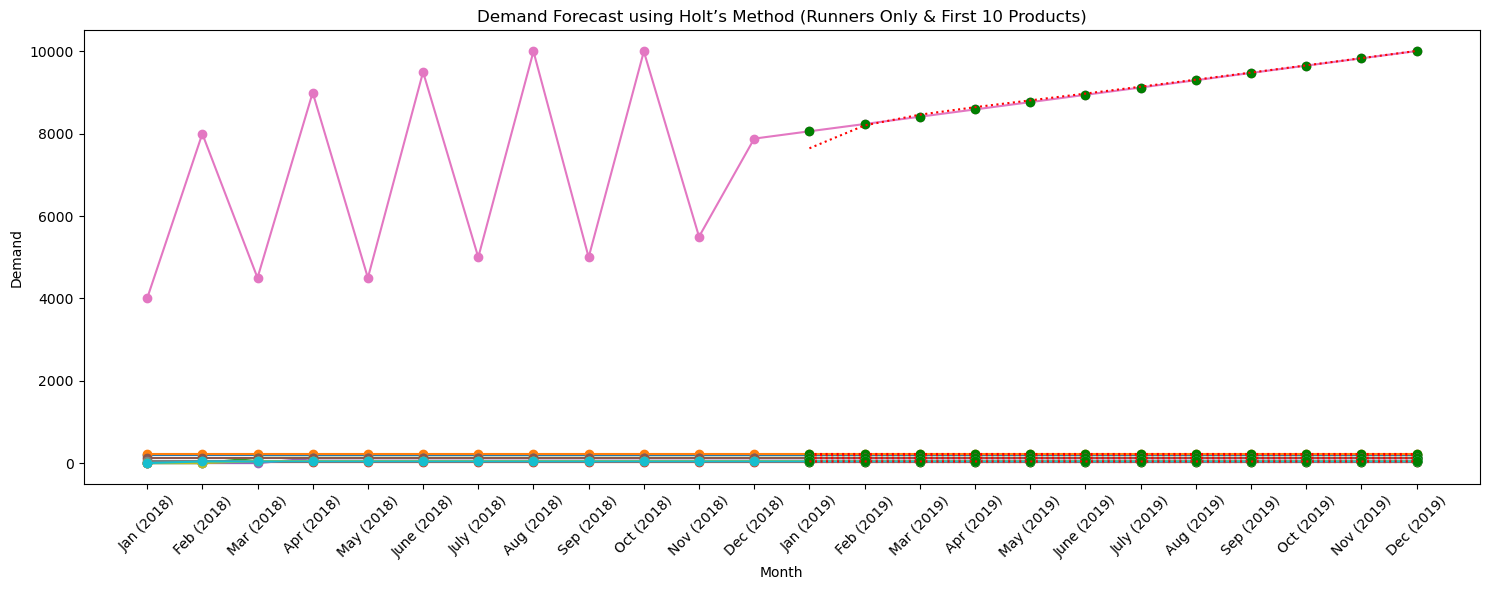

Average MAD for first 10 products: 5.796421288752326
Average MSE for first 10 products: 1506.586790258541
Average MAPE for first 10 products: 0.28831538071668833


In [180]:
# Filter for 'Runners' products
df_runners = df[df['Coeff_Code'] == 'Runner'].set_index('Part ID').drop(columns=['Coeff_Code'])

start_index_2018 = df_runners.columns.get_loc("Jan (2018)")
end_index_2018 = df_runners.columns.get_loc("Dec (2018)")
start_index_2019 = df_runners.columns.get_loc("Jan (2019)")
end_index_2019 = df_runners.columns.get_loc("Dec (2019)")

# Define the smoothing coefficients
alpha = 0.8
beta = 0.3

# Initialize a figure for plotting
plt.figure(figsize=(15, 6))

# Counter to track the number of products processed
num_products_processed = 0

# Initialize lists to store metrics for each product
mad_list = []
mse_list = []
mape_list = []

# Process each product
for product_id, row in df_runners.iterrows():
     if num_products_processed < 10:
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(method='ffill').dropna()

        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1]
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        # Fit the model on the training data if it's not empty
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

            forecasts = []
            errors = []

            # Forecast for each period in 2019
            rolling_forecasts = pd.Series(index=test_data.index)
            
            # Perform rolling forecasting
            for period, actual_value in test_data.items():
                # Forecast the next step
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                rolling_forecasts.at[period] = next_forecast

                # Calculate error for the forecasted step
                error = actual_value - next_forecast
                errors.append(error)
                
                # Update the training data with the new actual value
                train_data.at[period] = actual_value
                model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
            
            # Calculate MAD, MSE, MAPE for the product
            mad = np.mean(np.abs(errors))
            mse = np.mean(np.square(errors))
            mape = np.mean(np.abs(np.divide(errors, test_data)))*100
            
            # Store the calculated metrics
            mad_list.append(mad)
            mse_list.append(mse)
            mape_list.append(mape)

            # Plot the results
            plt.plot(train_data.index, train_data, label=f'{product_id} Actual 2018 Demand', marker='o')
            plt.plot(test_data.index, test_data, label=f'{product_id} Actual 2019 Demand', marker='o', linestyle='', color='green')
            plt.plot(rolling_forecasts.index, rolling_forecasts, label=f'{product_id} Forecasted 2019 Demand', linestyle=':', color='red')
        
        # Increment the counter
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand Forecast using Holt’s Method (Runners Only & First 10 Products)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')

#### Spikers (First 10 Products)

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

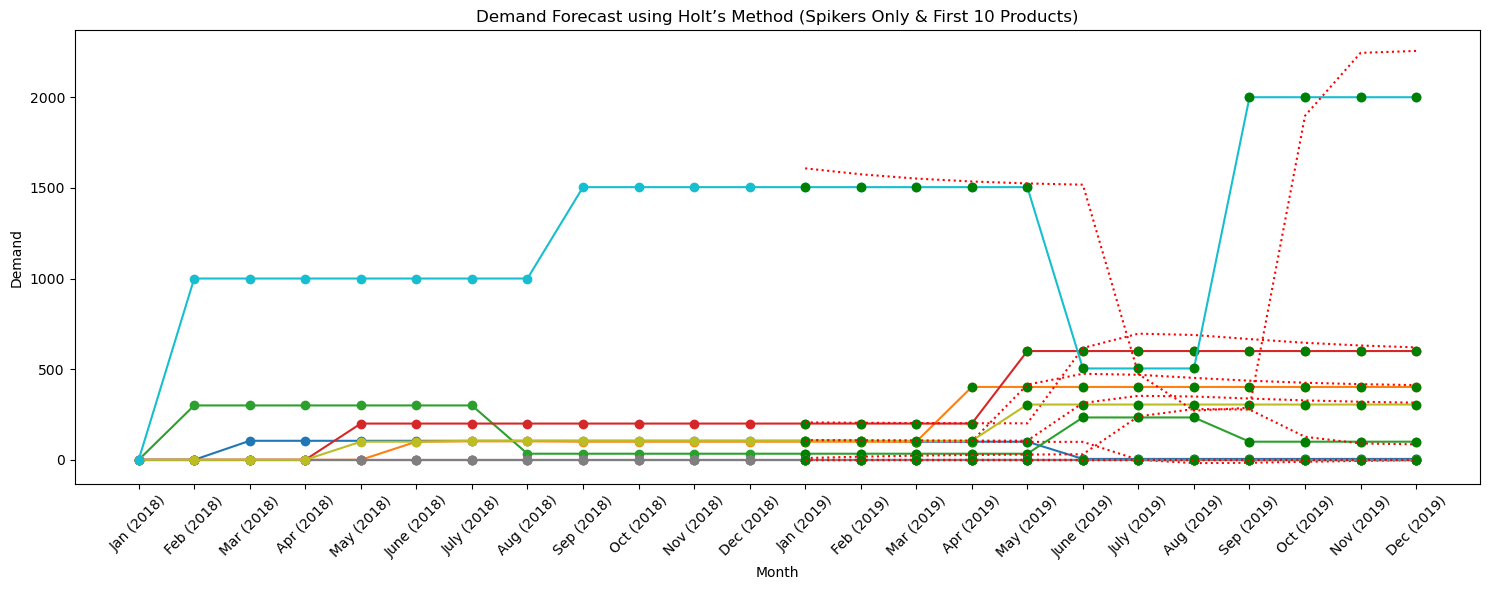

Average MAD for first 10 products: 53.02623050534196
Average MSE for first 10 products: 38283.43515232207
Average MAPE for first 10 products: nan


In [181]:
# Filter for 'Spikers' and 'Stranger' products
df_selected = df[df['Coeff_Code'].isin(['Spiker', 'Stranger'])].set_index('Part ID').drop(columns=['Coeff_Code'])

start_index_2018 = df_selected.columns.get_loc("Jan (2018)")
end_index_2018 = df_selected.columns.get_loc("Dec (2018)")
start_index_2019 = df_selected.columns.get_loc("Jan (2019)")
end_index_2019 = df_selected.columns.get_loc("Dec (2019)")

# Define the smoothing coefficients
alpha = 0.8
beta = 0.3

# Initialize a figure for plotting
plt.figure(figsize=(15, 6))

# Counter to track the number of products processed
num_products_processed = 0

# Initialize lists to store metrics for each product
mad_list = []
mse_list = []
mape_list = []

# Process each product
for product_id, row in df_selected.iterrows():
     if num_products_processed < 10:
        numeric_data = pd.to_numeric(row, errors='coerce').fillna(method='ffill').dropna()

        train_data = numeric_data.iloc[start_index_2018:end_index_2018+1]
        test_data = numeric_data.iloc[start_index_2019:end_index_2019+1]
        
        # Fit the model on the training data if it's not empty
        if not train_data.empty:
            model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

            forecasts = []
            errors = []

            # Forecast for each period in 2019
            rolling_forecasts = pd.Series(index=test_data.index)
            
            # Perform rolling forecasting
            for period, actual_value in test_data.items():
                # Forecast the next step
                next_forecast = fitted_model.forecast(steps=1).iloc[0]
                rolling_forecasts.at[period] = next_forecast

                # Calculate error for the forecasted step
                error = actual_value - next_forecast
                errors.append(error)
                
                # Update the training data with the new actual value
                train_data.at[period] = actual_value
                model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
                fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
            
            # Calculate MAD, MSE, MAPE for the product
            mad = np.mean(np.abs(errors))
            mse = np.mean(np.square(errors))
            mape = np.mean(np.abs(np.divide(errors, test_data)))*100
            
            # Store the calculated metrics
            mad_list.append(mad)
            mse_list.append(mse)
            mape_list.append(mape)

            # Plot the results
            plt.plot(train_data.index, train_data, label=f'{product_id} Actual 2018 Demand', marker='o')
            plt.plot(test_data.index, test_data, label=f'{product_id} Actual 2019 Demand', marker='o', linestyle='', color='green')
            plt.plot(rolling_forecasts.index, rolling_forecasts, label=f'{product_id} Forecasted 2019 Demand', linestyle=':', color='red')
        
        # Increment the counter
        num_products_processed += 1

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand Forecast using Holt’s Method (Spikers Only & First 10 Products)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')